In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import style
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from math import exp, log10
sns.set()
# Scipy Optimization Algorithm is used to find the optimal parameters
import scipy.optimize as opt
# Scipy is needed to load a MATLAB digit dataset
from scipy.io import loadmat
# SVM Classifier from sklearn
from sklearn import svm
import string as str
import re
from IPython.display import Image, display

In [8]:
data1 = loadmat('ex6data1')
data2 = loadmat('ex6data2')
data3 = loadmat('ex6data3')

In [9]:
X1 = np.array(pd.DataFrame.from_dict(data1['X']))
Y1 = np.array(pd.DataFrame.from_dict(data1['y']))
X2 = np.array(pd.DataFrame.from_dict(data2['X']))
Y2 = np.array(pd.DataFrame.from_dict(data2['y']))
X3 = np.array(pd.DataFrame.from_dict(data3['X']))
Y3 = np.array(pd.DataFrame.from_dict(data3['y']))
X3val = np.array(pd.DataFrame.from_dict(data3['Xval']))
Y3val = np.array(pd.DataFrame.from_dict(data3['yval']))

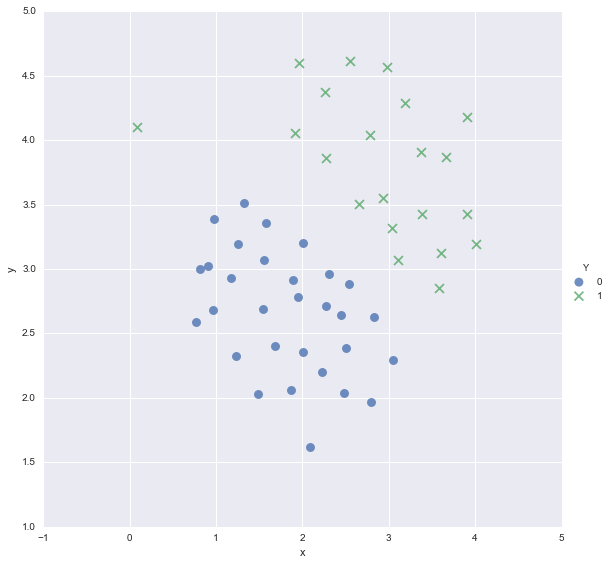

In [10]:
d1=pd.DataFrame.from_dict(data1['X'])
d1['y']=pd.DataFrame.from_dict(data1['y'])
d1.columns = ['x', 'y', 'Y']
sns.lmplot(x='x', y='y', hue='Y', data=d1, fit_reg=False, markers=["o", "x"], size=8, scatter_kws={"s": 80})

In [11]:
clf = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
clf.fit(X1, Y1) 
clf.score(X1, Y1) 

C:\Roman Kutskyi\Anaconda\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.98039215686274506

In [12]:
clf = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
clf.fit(X1, Y1) 
clf.score(X1, Y1) 

C:\Roman Kutskyi\Anaconda\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.94117647058823528

In [13]:
clf.predict(X1)  #gives an values 1 / 0

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1], dtype=uint8)

In [14]:
d1=pd.DataFrame.from_dict(data1['X'])
d1['y']=pd.DataFrame.from_dict(data1['y'])
d1.columns = ['x', 'y', 'Y']
d1.head()

,x,y,Y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


## Work with dataset 2

To find non-linear decision boundaries with the SVM, we need to first im-
plement a Gaussian kernel. You can think of the Gaussian kernel as a sim-
ilarity function that measures the \distance" between a pair of examples,
(x(i); x(j)). The Gaussian kernel is also parameterized by a bandwidth pa-
rameter, , which determines how fast the similarity metric decreases (to 0)
as the examples are further apart.

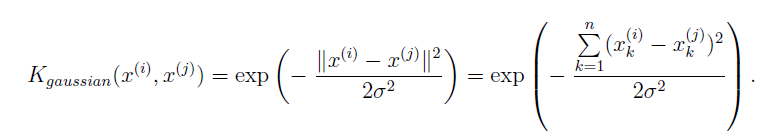

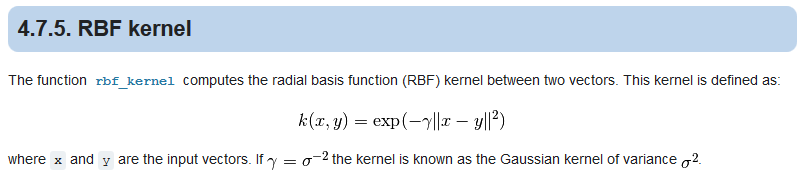

In [15]:
display(Image(filename='SVM1.PNG', embed=True, width=500))
display(Image(filename='SVM2.PNG', embed=True, width=600))

In [16]:
X2.shape, Y2.shape

((863, 2), (863, 1))

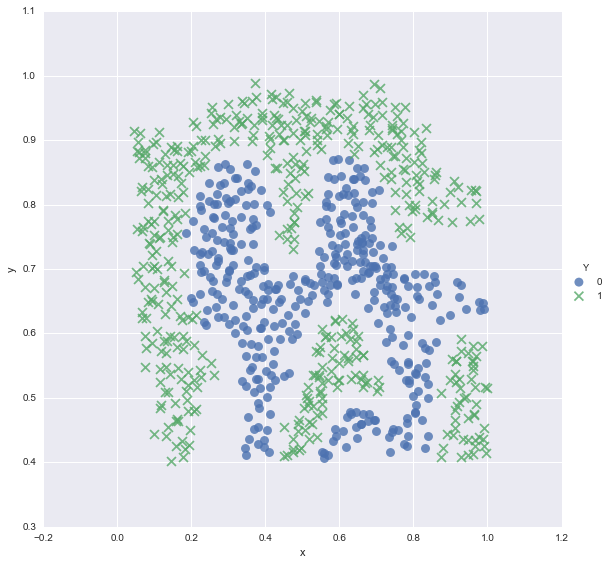

In [17]:
d2=pd.DataFrame.from_dict(data2['X'])
d2['y']=pd.DataFrame.from_dict(data2['y'])
d2.columns = ['x', 'y', 'Y']
sns.lmplot(x='x', y='y', hue='Y', data=d2, fit_reg=False, markers=["o", "x"], size=8, scatter_kws={"s": 80})

In [18]:
svc = svm.SVC(C=100, gamma=2, probability=True, kernel='rbf')    
svc.fit(X2, Y2)  
ff = svc.predict_proba(X2)    # svc.predict_proba  - return the probability (not 1/0)
print(ff[:5,])

[[  1.51430310e-06   9.99998486e-01]
 [  7.15167439e-07   9.99999285e-01]
 [  6.18167802e-06   9.99993818e-01]
 [  6.64134118e-02   9.33586588e-01]
 [  6.13427896e-02   9.38657210e-01]]


C:\Roman Kutskyi\Anaconda\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


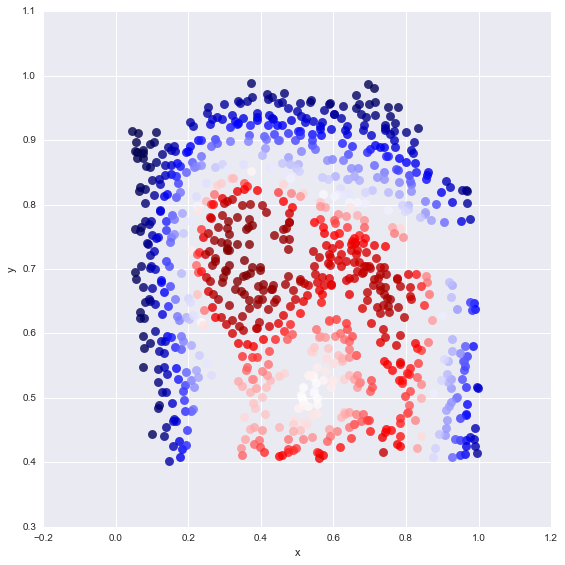

In [19]:
d2['pred'] = ff[:,0]
sns.lmplot(x='x', y='y', hue='pred', data=d2, fit_reg=False, size=8, scatter_kws={"s": 80}, legend=False, palette='seismic')

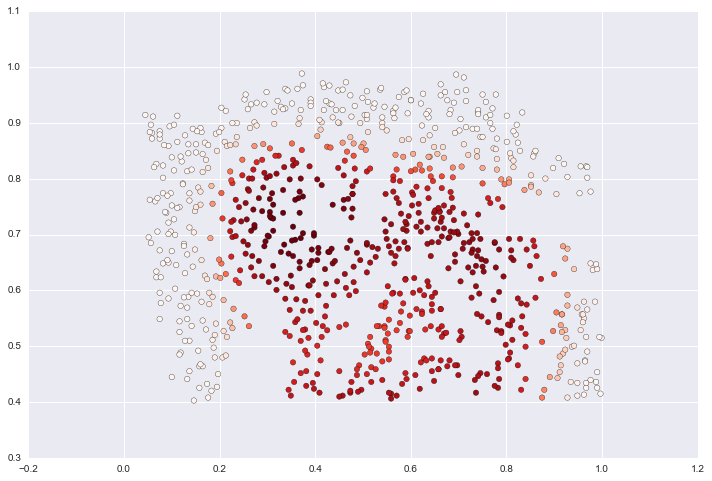

In [20]:
#One more way to visualize this. Work faster
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(d2['x'], d2['y'], s=30, c=d2['pred'], cmap='Reds')  # c=d2['pred'] set a colour gradient for points

In [21]:
clf = svm.SVC(kernel='rbf', C=600, gamma=0.1)   #SVM optimization
clf_fit = clf.fit(X2, Y2)
clf.support_vectors_.shape

C:\Roman Kutskyi\Anaconda\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


(478, 2)

http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
#### The C parameter trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.

#### Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.


The behavior of the model is very sensitive to the gamma parameter. If gamma is too large, the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting.

When gamma is very small, the model is too constrained and cannot capture the complexity or “shape” of the data. The region of influence of any selected support vector would include the whole training set. The resulting model will behave similarly to a linear model with a set of hyperplanes that separate the centers of high density of any pair of two classes.

For intermediate values, we can see on the second plot that good models can be found on a diagonal of C and gamma. Smooth models (lower gamma values) can be made more complex by selecting a larger number of support vectors (larger C values) hence the diagonal of good performing models.

C:\Roman Kutskyi\Anaconda\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


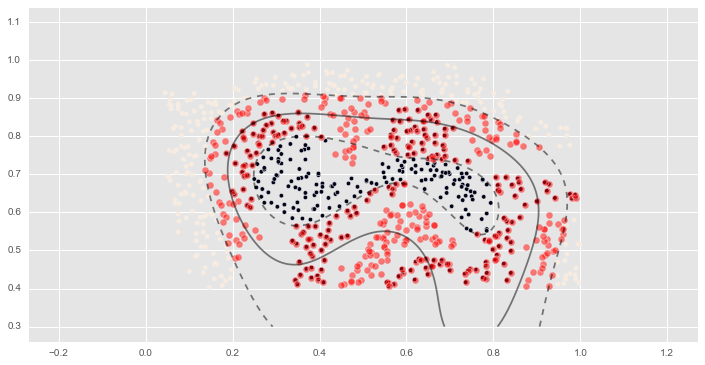

C:\Roman Kutskyi\Anaconda\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


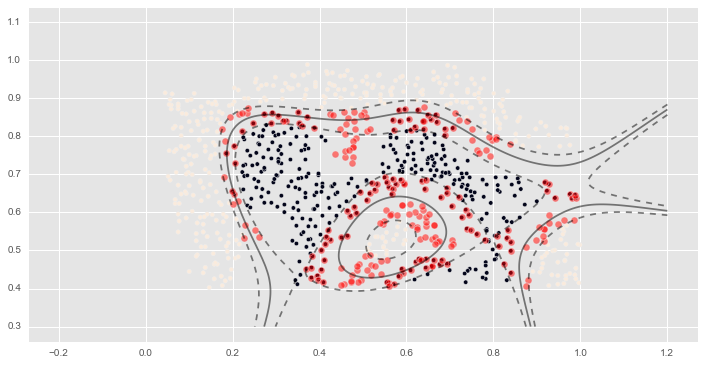

In [22]:
def draw_svm(X, y, C=1.0, gamma='auto'):
    plt.scatter(X[:,0], X[:,1], c=y)  #plot the points from dataset
    clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)   #SVM optimization
    clf_fit = clf.fit(X, y)   #SVM optimization

    ax = plt.gca()              #get the limits for X and Y from the scatter plot
    xlim = ax.get_xlim()        #get the limits for X and Y from the scatter plot
    ylim = ax.get_ylim()         #get the limits for X and Y from the scatter plot

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T         # the table with two columns of all parameter xx and yy combinations 
    Z = clf.decision_function(xy).reshape(XX.shape)    # get the desigion function for xy parameter space

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0],              # Show the support vector points
                clf.support_vectors_[:, 1], 
                s=50, linewidth=1, facecolors='red', alpha=0.5)
    plt.show()
    return clf_fit

plt.rcParams['figure.figsize'] = (12, 6)
style.use('ggplot')

clf_arr = []
clf_arr.append(draw_svm(X2, Y2, 0.5, 10))
clf_arr.append(draw_svm(X2, Y2, 120, 5))
#clf_arr.append(draw_svm(X2, Y2, 10))
#clf_arr.append(draw_svm(X2, Y2, 100))

## Work with Dataset 3
### RBF kernel is a stationary kernel. It is also known as the “squared exponential” kernel. This type of kernel is used by default in svm.SVC

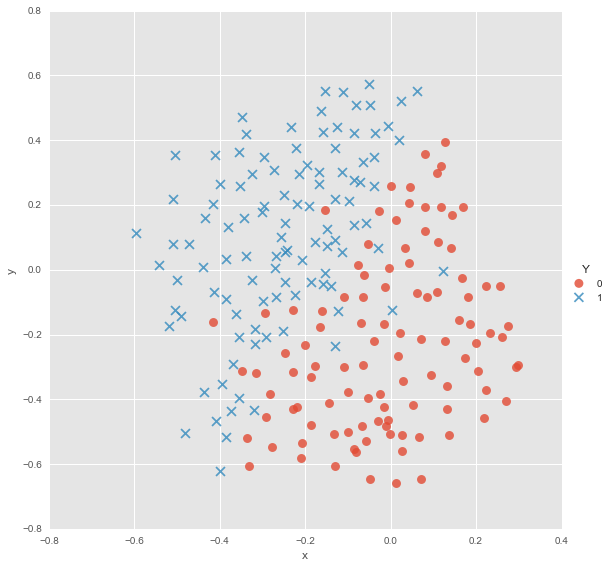

In [23]:
d3=pd.DataFrame.from_dict(data3['X'])
d3['y']=pd.DataFrame.from_dict(data3['y'])
d3.columns = ['x', 'y', 'Y']
sns.lmplot(x='x', y='y', hue='Y', data=d3, fit_reg=False, markers=["o", "x"], size=8, scatter_kws={"s": 80})

In [24]:
C=np.array([0.3,10,70,100])
g=np.array([0.1,1,5,30,100])
CC, gg = np.meshgrid(C,g)
scores = np.zeros(CC.shape)
for i in range (len(scores[:,0])):
    for j in range (len(scores[0,:])):
        svc = svm.SVC(C=CC[i,j], gamma=gg[i,j], probability=True, kernel='rbf')  
        svc.fit(X3, Y3) 
        scores[i,j] = svc.score(X3val,Y3val)

C:\Roman Kutskyi\Anaconda\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
C:\Roman Kutskyi\Anaconda\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
C:\Roman Kutskyi\Anaconda\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
C:\Roman Kutskyi\Anaconda\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

In [25]:
scores.max()

0.96499999999999997

In [26]:
ind = np.unravel_index(np.argmax(scores, axis=None), scores.shape)
print('max Score = ',scores[ind],'\noptimal gamma = ',gg[ind],'\noptimal C = ', CC[ind])

max Score =  0.965 
optimal gamma =  100.0 
optimal C =  0.3


In [27]:
gg[ind]

100.0

In [28]:
svc = svm.SVC(C=CC[ind], gamma=gg[ind], probability=True, kernel='rbf')
svc.fit(X3, Y3)
d3=pd.DataFrame.from_dict(data3['Xval'])
d3['y']=pd.DataFrame.from_dict(data3['yval'])
d3.columns = ['x', 'y', 'Y']
ff=svc.predict_proba(X3val)
d3['pred'] = ff[:,0]

C:\Roman Kutskyi\Anaconda\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


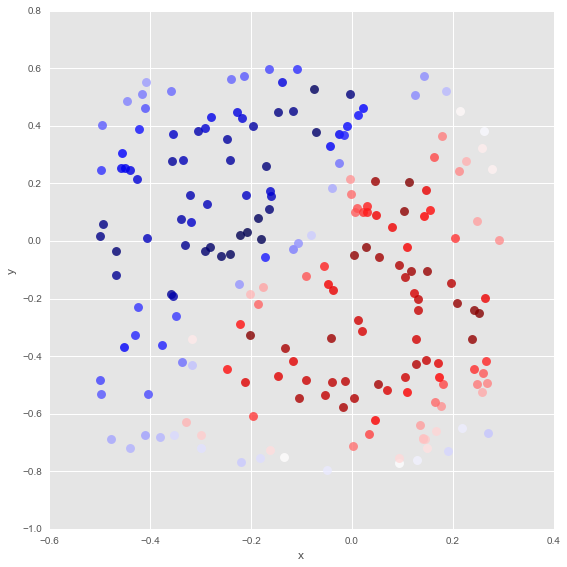

In [29]:
sns.lmplot(x='x', y='y', hue='pred', data=d3, fit_reg=False, size=8, scatter_kws={"s": 80}, legend=False, palette='seismic')

C:\Roman Kutskyi\Anaconda\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


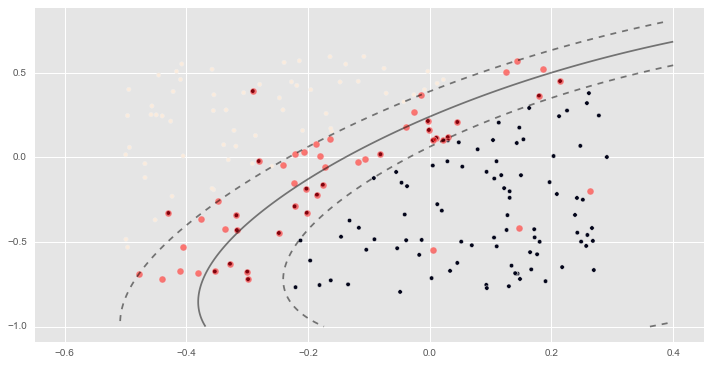

C:\Roman Kutskyi\Anaconda\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


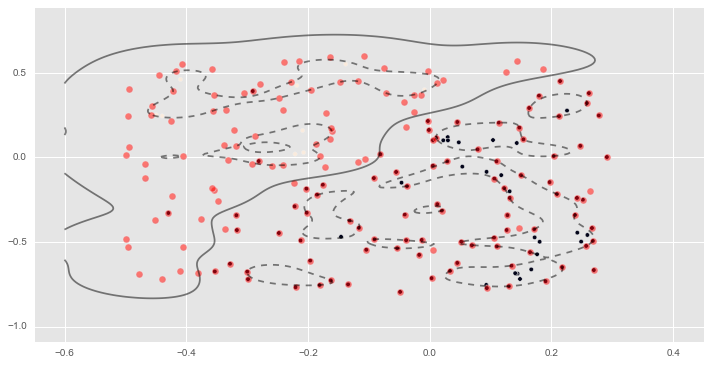

In [30]:
clf_arr.append(draw_svm(X3val, Y3val, 100, 0.3)) # low C --> high lambda---> no overfitting
clf_arr.append(draw_svm(X3val, Y3val, 0.3, 100))

## Let`s try to separate points manually

In [31]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

In [32]:
r=np.exp(-(X3**2).sum(1))
r.reshape(-1,1)

array([[ 0.8146204 ],
       [ 0.70987422],
       [ 0.6839952 ],
       [ 0.69132641],
       [ 0.74190491],
       [ 0.87921207],
       [ 0.97316638],
       [ 0.97643616],
       [ 0.9239956 ],
       [ 0.81105457],
       [ 0.8068349 ],
       [ 0.82385732],
       [ 0.89889885],
       [ 0.9381266 ],
       [ 0.91519396],
       [ 0.86612157],
       [ 0.76679588],
       [ 0.85531808],
       [ 0.96248256],
       [ 0.86614908],
       [ 0.95158531],
       [ 0.90264027],
       [ 0.86588506],
       [ 0.79638616],
       [ 0.72255003],
       [ 0.76161299],
       [ 0.89202205],
       [ 0.9393089 ],
       [ 0.99082846],
       [ 0.96193423],
       [ 0.88875554],
       [ 0.85891006],
       [ 0.80558146],
       [ 0.81709601],
       [ 0.91161521],
       [ 0.98564562],
       [ 0.92928177],
       [ 0.98431078],
       [ 0.98518893],
       [ 0.80337232],
       [ 0.93440725],
       [ 0.99402258],
       [ 0.99766721],
       [ 0.97614051],
       [ 0.81889919],
       [ 0

<function __main__.plot_3D>

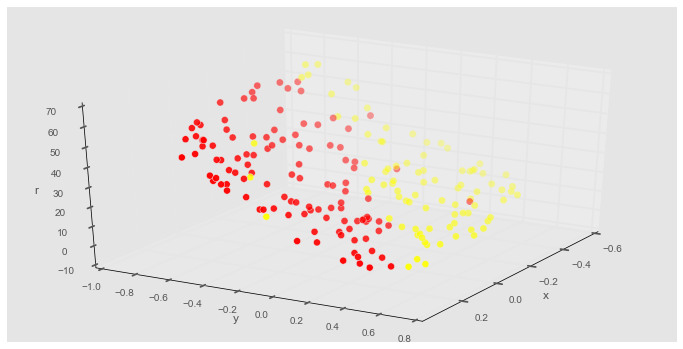

In [33]:
def plot_3D(elev=30, azim=30, X=X3val, y=Y3val):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], clf.decision_function(X3val).reshape(-1,1), c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
interact(plot_3D, elev=[-90, 90], azip=(-180, 180), X=fixed(X3val), y=fixed(Y3val))

## Spam Classification

In [34]:
test = loadmat('spamTest')
train = loadmat('spamTrain')

In [35]:
X = np.array(pd.DataFrame.from_dict(train['X']))
Y = np.array(pd.DataFrame.from_dict(train['y']))
Xtest = np.array(pd.DataFrame.from_dict(test['Xtest']))
Ytest = np.array(pd.DataFrame.from_dict(test['ytest']))

In [36]:
X.shape, Y.shape  # 4000 training emails wiht 1899 eatures in each (1899 vector)

((4000, 1899), (4000, 1))

In [37]:
svc = svm.SVC(kernel='rbf')    
svc.fit(X, Y)

C:\Roman Kutskyi\Anaconda\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
svc.score(Xtest, Ytest)

0.95299999999999996

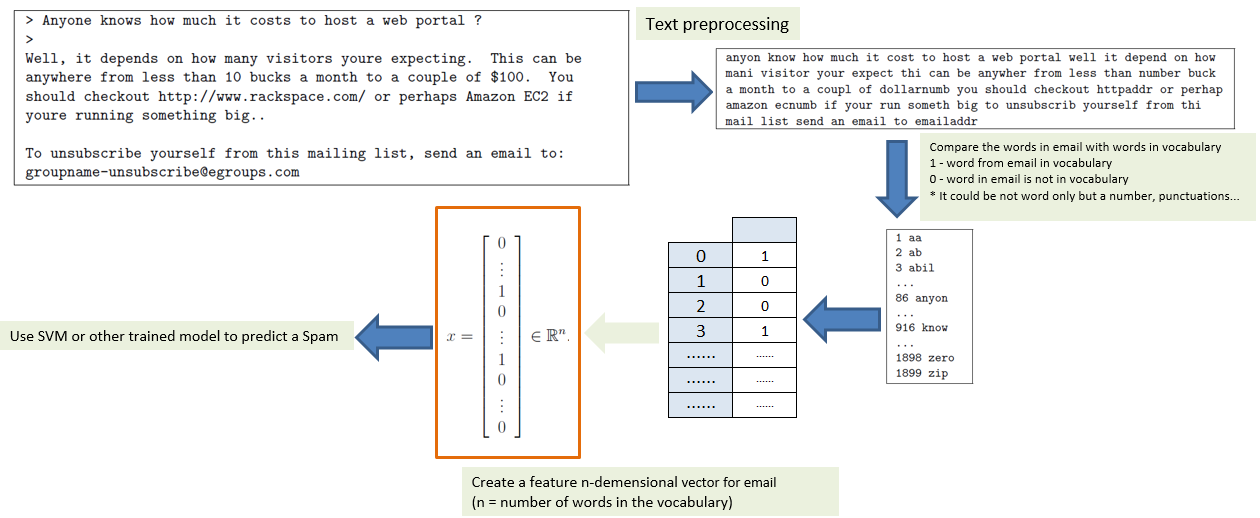

In [39]:
display(Image(filename='SVM3.PNG', embed=True, width=1000))

In [40]:
# The function which read the email and convert it to the 1/0 vector according to vocabulary
def read_mail(mail='spamSample1.txt', vocab='vocab.txt'):
    data = pd.read_csv(vocab,sep='\t', header = None)
    #Indexing the data
    data.columns=['number', 'vocab']
    data.head()
    with open (mail, encoding='utf-8') as file:
        f=file.read()
        file.close()
        
    f=f.lower()
    f=f.split()
    f1=[]  # create a matrix with words without last letter (vocabulary have a stripped words)
    #f2=[]  # create a matrix with words without two last letters (vocabulary have a stripped words)
    num=''
    
    for i in range(len(f)):
        
        if set('0123456789').intersection(set(f[i]))!=set():   # check the number in the f[i]
            num = 'number'
        
        if '$' in f[i]:
            #f[i].replace('$', 'dollar')
            f[i]=re.sub('\$', 'dollar', f[i])
            
        if 'http' in f[i] or 'www' in f[i]:
            f[i] = 'httpaddr'
            
        if '@' in f[i]:
            f[i] = 'emailaddr'
        f[i] = f[i].strip(str.punctuation + str.whitespace + '0123456789')   # we will delete all numbers from email 
        f1.append(f[i][0:-1])    #append to the matrix a word without last letter
        #f2.append(f[i][0:-2])    #append to the matrix a word without two last letters
    f1=f1+f #+f2
    f1.append(num)
    # create a True/False column in the data
    data['mail']=data['vocab'].isin(f1)
    data['mail']=data['mail'].astype(int) # convert True/False to 1/0
    mail = np.array(data['mail']) # create a vector 1/0 for email
    return mail

mail1 = read_mail(mail='spamSample1.txt')
mail2 = read_mail(mail='spamSample2.txt')
mail3 = read_mail(mail='emailSample1.txt')
mail4 = read_mail(mail='emailSample2.txt')
mails=np.vstack((mail1, mail2, mail3, mail4))
print(mails.shape)

(4, 1899)


In [41]:
mail3.sum()  # shows 43, in the task 45, so some words were not detected because of word stemming, I did not use it
             # You can use f2 list (adds a words without two last letters), but the overfitting will occure

43

In [42]:
mails.shape

(4, 1899)

In [43]:
y_mails=svc.predict(mails)

In [44]:
y_mails    # the second email is not classified as Spam, but it is

array([1, 0, 0, 0], dtype=uint8)